https://data.mendeley.com/datasets/wj9rwkp9c2/1  Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

In [1]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded

--2025-03-06 20:00:11--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2025-03-06 20:00:12--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.64.174, 3.5.70.152, 3.5.68.164, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.64.174|:443... conn

In [2]:
!pip install shap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/file_downloaded')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df['ID'].nunique()

800

In [7]:
df['CLASS'].nunique()

5

In [8]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [9]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [10]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [11]:
df['Gender'].nunique()

3

In [12]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [13]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


<Axes: xlabel='Gender'>

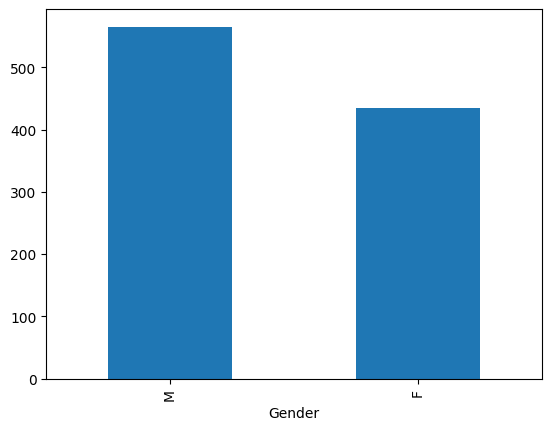

In [15]:
df['Gender'].value_counts().plot(kind = 'bar')

In [16]:
df['AGE'].nunique()

50

In [17]:
age_range_buckets = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_range_buckets

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [18]:
df['age_range'] = pd.cut(x=df['AGE'], bins=8, labels=age_range_buckets)
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,[80 - 90)
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,[30 - 40)
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,[30 - 40)
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,[40 - 50)


In [19]:
df['age_range'].value_counts()

,count
age_range,
[60 - 70),476
[70 - 80),274
[50 - 60),79
[40 - 50),58
[30 - 40),54
[80 - 90),36
[90 - 100),19
[20 - 30),4


In [21]:
# Convert 'Gender' and 'age_range' columns to numeric type before calculating correlation.
# Assuming 'Gender' has 'M' and 'F', we'll use Label Encoding.
# Assuming 'age_range' is categorical we'll use Label encoding.

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

le = LabelEncoder()  # Create LabelEncoder object
df['Gender_encoded'] = le.fit_transform(df['Gender'])  # Encode 'Gender' column

le2 = LabelEncoder()  # Create LabelEncoder object
df['age_range_encoded'] = le.fit_transform(df['age_range'])  # Encode 'Gender' column


correlation_values = df.select_dtypes(include=['number']).corr()  # Select only numeric columns for correlation

In [22]:
correlation_values

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_encoded,age_range_encoded
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409,0.018070,-0.066356
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719,0.051795,-0.083628
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.021486,0.975731
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.116311,0.106910
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.154870,0.063510
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,-0.009362,0.365895
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,-0.064763,0.026507
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.052111,0.146934
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.130130,-0.015973
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.054563,0.011297


<Axes: >

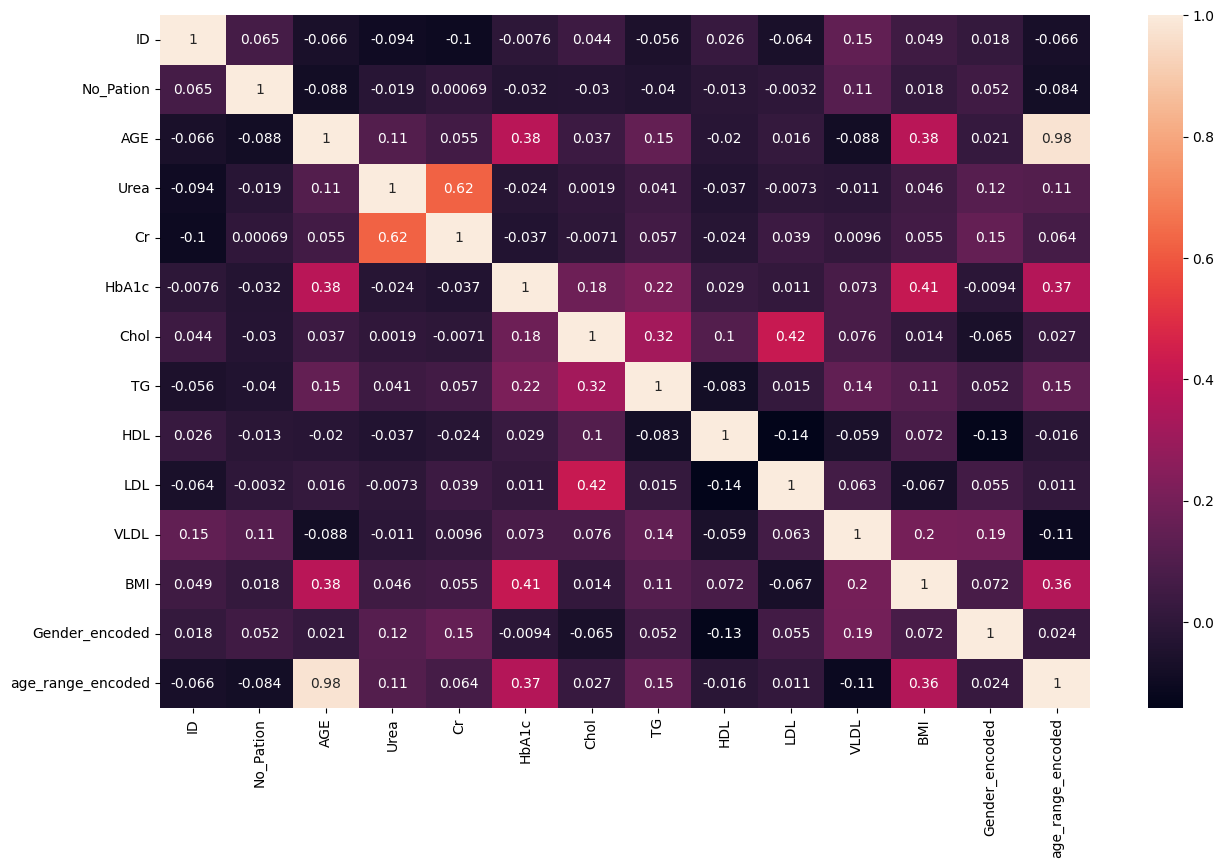

In [23]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [24]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1)
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range,Gender_encoded,age_range_encoded
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70),0,4
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30),1,0
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70),0,4
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70),0,4
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,[80 - 90),1,6
996,M,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,[30 - 40),1,1
997,M,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,[30 - 40),1,1
998,M,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,[40 - 50),1,2


In [25]:
le1 = LabelEncoder()
df2['Gender'] =le1.fit_transform(df2['Gender'])
le2 = LabelEncoder()
df2['CLASS'] =le2.fit_transform(df2['CLASS'])
le3 = LabelEncoder()
df2['age_range'] =le3.fit_transform(df2['age_range'])

In [26]:
le1.classes_

array(['F', 'M'], dtype=object)

In [27]:
le2.classes_

array(['N', 'P', 'Y'], dtype=object)

In [28]:
le3.classes_

array(['[20 - 30)', '[30 - 40)', '[40 - 50)', '[50 - 60)', '[60 - 70)',
       '[70 - 80)', '[80 - 90)', '[90 - 100)'], dtype=object)

In [29]:
df2

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range,Gender_encoded,age_range_encoded
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0,4
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0,1,0
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0,4
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4,0,4
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2,6,1,6
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2,1,1,1
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2,1,1,1
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2,2,1,2


In [30]:
scaler = MinMaxScaler()

In [31]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = df2[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
df2_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
df2_scaled

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [32]:
df3 = pd.concat([df2,df2_scaled],axis=1)
df3

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,...,age_range_encoded,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,...,0,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,...,1,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,...,6,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
996,1,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,...,1,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
997,1,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,...,1,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
998,1,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,...,2,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


In [33]:
X = df3[['Gender','age_range','Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']].values
y = df3['CLASS'].values
train_set, test_set,train_label,test_label = train_test_split(X,y,test_size=0.20,random_state=0)

In [34]:
X[0]

array([0.        , 4.        , 0.109375  , 0.05037783, 0.26490066,
       0.40776699, 0.04444444, 0.22680412, 0.11458333, 0.01146132,
       0.17391304])

In [35]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [36]:
results = []
names = []

In [37]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

LR: 0.8200000000000001 (0.3306055050963308)
KNN: 0.7809999999999999 (0.3497270364155451)
NB: 0.8220000000000001 (0.2690278795961489)
SVC: 0.783 (0.35273361053350155)
RFC: 0.8390000000000001 (0.3270917302531509)
DTR: 0.849 (0.2748253991173305)
XGB: nan (nan)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

In [38]:
XGBClassifier_model = XGBClassifier()
XGBClassifier_model_fitted = XGBClassifier_model.fit(train_set,train_label)
XGBClassifier_model_prediction = XGBClassifier_model.predict(test_set)

In [39]:
df3['CLASS'].unique() #0 means No diabetes, 1 means predicted, 2 means diabetes

array([0, 1, 2])

In [40]:
print('XGB Classifier Accuracy Score:\n', accuracy_score(test_label, XGBClassifier_model_prediction))

XGB Classifier Accuracy Score:
 0.995


In [41]:
print('XGB Classifier Report:\n', classification_report(test_label,XGBClassifier_model_prediction,target_names=['0','1','2']))

XGB Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200



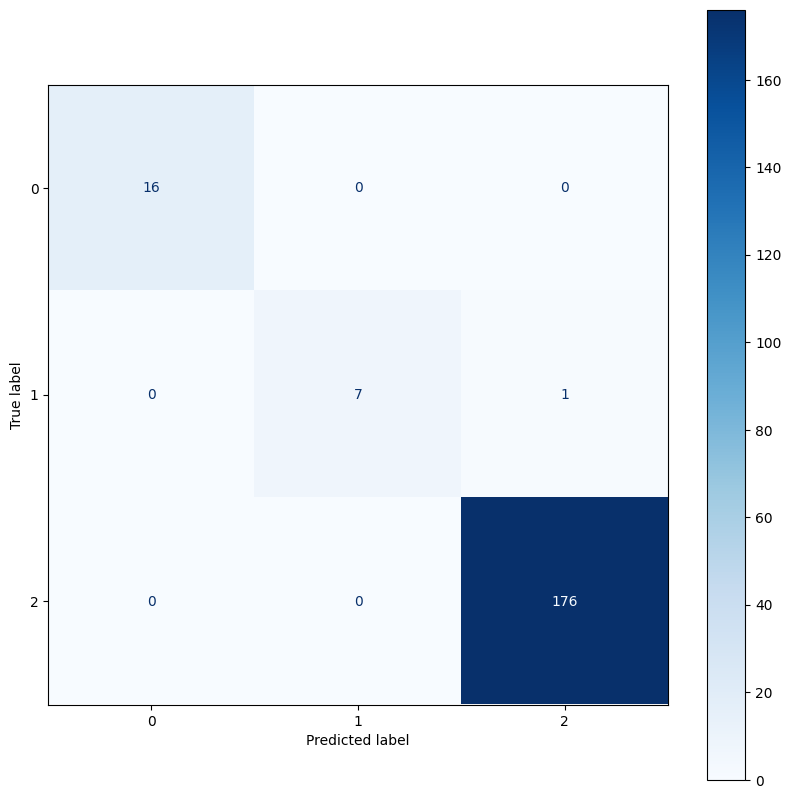

In [42]:
XGBClassifier_matrix = confusion_matrix(test_label,XGBClassifier_model_prediction)
XGBClassifier_confusion_matrix_display = ConfusionMatrixDisplay(XGBClassifier_matrix)
fig, ax = plt.subplots(figsize=(10,10))
XGBClassifier_confusion_matrix_display.plot(cmap=plt.cm.Blues,ax=ax)